## B반 최효진

## 의사결정나무_분류
유방암 결과를 분류하는 의사결정나무 모델을 만들고 predict method를 이용하여 목표변수 범주를 예측하라. 그리고 모델의 정확도와 confusion matrix를 구하라.

데이터 : 유방암.CSV(변수 : 31개, 자료 수: 569개)                           
-목표변수(diagnosis, 0: Malignant(악성, 357개), 1: Benign(양성, 212개)

#### 패키지 불러오기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

import graphviz

#### os 환경 설정 패키지

In [2]:
import os
os.environ["PATH"] += os.pathsep + "C:/Program Files (x86)/Graphviz2.38/bin/"

#### 한글 폰트 적용

In [3]:
matplotlib.rc("font", family = "NanumGothic")

#### 데이터 구성하기

In [4]:
df_raw = pd.read_csv("/home/pirl/Downloads/유방암.csv")
df_raw.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### 데이터 구성하기 

In [5]:
df_raw.fillna(df_raw.mean(), inplace=True)

df_raw_dummy = pd.get_dummies(df_raw)

df_raw_x = df_raw_dummy.drop("diagnosis", axis = 1, inplace = False)
df_raw_y = df_raw_dummy["diagnosis"] 

df_train_first_x, df_test_first_x, df_train_first_y, df_test_first_y = train_test_split(df_raw_x,df_raw_y,test_size=0.3, random_state = 1234)
print("train data X size : {}".format(df_train_first_x.shape))
print("train data Y size : {}".format(df_train_first_y.shape))
print("test data X size : {}".format(df_test_first_x.shape))
print("test data Y size : {}".format(df_test_first_y.shape))

train data X size : (398, 30)
train data Y size : (398,)
test data X size : (171, 30)
test data Y size : (171,)


In [6]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_train_first_x,df_train_first_y,test_size=0.4285, random_state = 1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("validation data X size : {}".format(df_test_x.shape))
print("validation data Y size : {}".format(df_test_y.shape))

train data X size : (227, 30)
train data Y size : (227,)
validation data X size : (171, 30)
validation data Y size : (171,)


#### 결측치 확인하기

In [7]:
df_raw.isnull().sum()

diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

### ==> train 70%, test 30% 분할 , train을 train 40% validation 30%로 분할 

In [8]:
df_raw["diagnosis"]
df_train_x

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
540,11.540,14.44,74.65,402.9,0.09984,0.11200,0.067370,0.025940,0.1818,0.06782,...,12.260,19.68,78.78,457.8,0.13450,0.21180,0.17970,0.06918,0.2329,0.08134
24,16.650,21.38,110.00,904.6,0.11210,0.14570,0.152500,0.091700,0.1995,0.06330,...,26.460,31.56,177.00,2215.0,0.18050,0.35780,0.46950,0.20950,0.3613,0.09564
84,12.000,15.65,76.95,443.3,0.09723,0.07165,0.041510,0.018630,0.2079,0.05968,...,13.670,24.90,87.78,567.9,0.13770,0.20030,0.22670,0.07632,0.3379,0.07924
79,12.860,18.00,83.19,506.3,0.09934,0.09546,0.038890,0.023150,0.1718,0.05997,...,14.240,24.82,91.88,622.1,0.12890,0.21410,0.17310,0.07926,0.2779,0.07918
546,10.320,16.35,65.31,324.9,0.09434,0.04994,0.010120,0.005495,0.1885,0.06201,...,11.250,21.77,71.12,384.9,0.12850,0.08842,0.04384,0.02381,0.2681,0.07399
174,10.660,15.15,67.49,349.6,0.08792,0.04302,0.000000,0.000000,0.1928,0.05975,...,11.540,19.20,73.20,408.3,0.10760,0.06791,0.00000,0.00000,0.2710,0.06164
320,10.250,16.18,66.52,324.2,0.10610,0.11110,0.067260,0.039650,0.1743,0.07279,...,11.280,20.61,71.53,390.4,0.14020,0.23600,0.18980,0.09744,0.2608,0.09702
119,17.950,20.01,114.20,982.0,0.08402,0.06722,0.072930,0.055960,0.2129,0.05025,...,20.580,27.83,129.20,1261.0,0.10720,0.12020,0.22490,0.11850,0.4882,0.06111
217,10.200,17.48,65.05,321.2,0.08054,0.05907,0.057740,0.010710,0.1964,0.06315,...,11.480,24.47,75.40,403.7,0.09527,0.13970,0.19250,0.03571,0.2868,0.07809
62,14.250,22.15,96.42,645.7,0.10490,0.20080,0.213500,0.086530,0.1949,0.07292,...,17.670,29.51,119.10,959.5,0.16400,0.62470,0.69220,0.17850,0.2844,0.11320


### 모델생성
#### train, test의 정확도 확인

In [9]:
tree_uncustomized = DecisionTreeClassifier(random_state=1234)
tree_uncustomized.fit(df_train_x, df_train_y)
print("Accuracy on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.936


#### 현재 생성된 트리모델의 옵션 확인

In [10]:
tree_uncustomized

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1234,
            splitter='best')

### 모델 Parameter 조정
#### max_depth : 최대 깊이 변경에 따른 정확도 변화

In [11]:
train_accuracy = []; test_accuracy = []
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(max_depth = v_max_depth, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.943,0.912
1,2,0.982,0.942
2,3,0.982,0.942
3,4,0.996,0.936
4,5,1.000,0.936
5,6,1.000,0.936
6,7,1.000,0.936
7,8,1.000,0.936
8,9,1.000,0.936
9,10,1.000,0.936


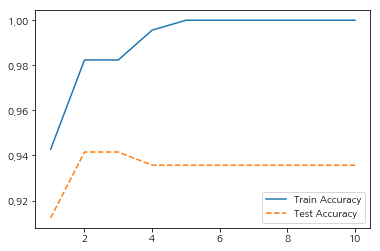

In [12]:
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

In [13]:
# 임의로 지정
max_depth = 3

### 모델 Parameter 조정 시각화

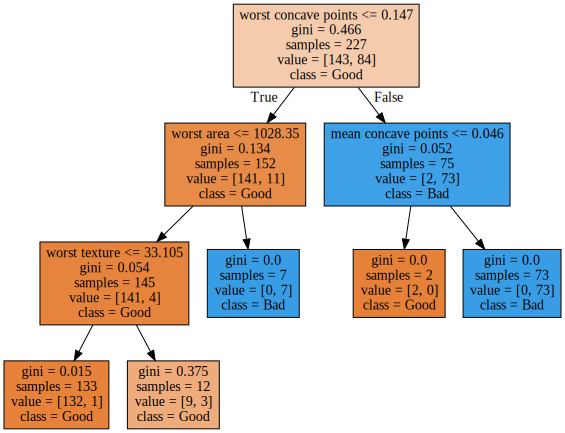

In [14]:
v_feature_names = df_train_x.columns
tree_depth3 = DecisionTreeClassifier(max_depth = 3, random_state=1234)
tree_depth3.fit(df_train_x, df_train_y)
export_graphviz(tree_depth3, out_file="tree_depth3.dot", class_names = ["Good", "Bad"],
                feature_names = v_feature_names, impurity = True, filled = True)
with open("tree_depth3.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

#### min_samples_split : 분할하기 위한 노드의 최소 샘플 수 

In [15]:
train_accuracy = []; test_accuracy = []
para_split = [n_split for n_split in range(2, 11)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(min_samples_split = v_min_samples_split, max_depth = 3, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,2,0.982,0.942
1,3,0.982,0.942
2,4,0.982,0.942
3,5,0.982,0.942
4,6,0.982,0.942
5,7,0.982,0.942
6,8,0.982,0.942
7,9,0.982,0.942
8,10,0.982,0.942


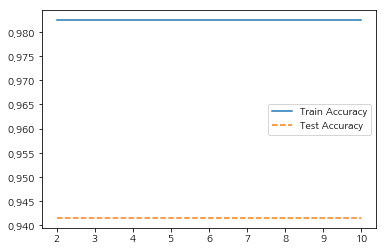

In [16]:
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

### ==> min_samples_split은 정확도에 영향을 미치지 않는다.

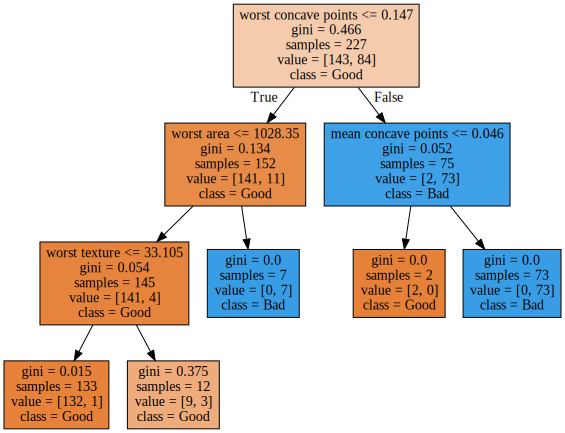

In [17]:
# 분리 노드의 최소 샘플 수가 50인 모델
tree_split50 = DecisionTreeClassifier(max_depth = 3, min_samples_split=50, random_state=1234)
tree_split50.fit(df_train_x, df_train_y)

export_graphviz(tree_split50, out_file="tree_split50.dot", class_names = ["Good", "Bad"],
                feature_names = v_feature_names, impurity = True, filled = True)

with open("tree_split50.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

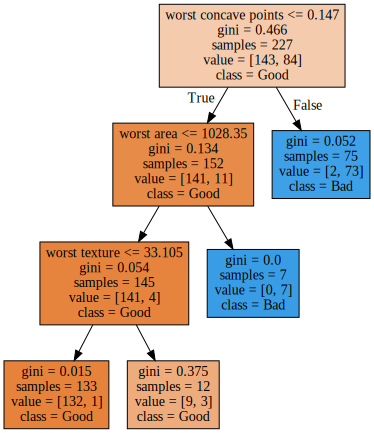

In [18]:
# 분리 노드의 최소 샘플 수가 100인 모델
tree_split100 = DecisionTreeClassifier(max_depth = 3, min_samples_split=100, random_state=1234)
tree_split100.fit(df_train_x, df_train_y)

export_graphviz(tree_split100, out_file="tree_split100.dot", class_names = ["Good", "Bad"],
                feature_names = v_feature_names, impurity = True, filled = True)

with open("tree_split100.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

### ==> 분리 노드의 최소 샘플 수가 50인 경우에는 분리, 100인 경우에는 분리 되지 않는다.

#### min_samples_leaf : 잎사귀 노드의 샘플 수 제한

In [19]:
train_accuracy = []; test_accuracy = []
para_leaf = [n_leaf * 10 for n_leaf in range(1, 11)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(min_samples_leaf = v_min_samples_leaf, max_depth = 3, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,10,0.969,0.930
1,20,0.943,0.912
2,30,0.943,0.912
3,40,0.943,0.912
4,50,0.943,0.912
5,60,0.943,0.912
6,70,0.943,0.912
7,80,0.938,0.918
8,90,0.938,0.918
9,100,0.903,0.871


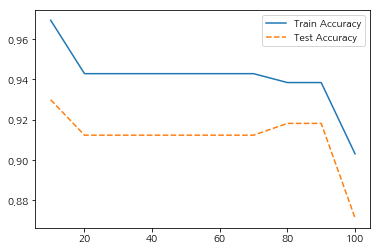

In [20]:
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

### ==> train 데이터는 잎사귀 수를 낮출수록 정확도가 높아진다.
### ==> 잎사귀 수가 적을수록 모델을 복잡하게 분리한다.
### ==> 잎사귀 수가 80인 모델이 더 나아보인다.

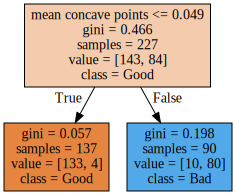

In [21]:
tree_leaf80 = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 80, random_state=1234)
tree_leaf80.fit(df_train_x, df_train_y)

export_graphviz(tree_leaf80, out_file="tree_leaf80.dot", class_names = ["Good", "Bad"],
                feature_names = v_feature_names, impurity = True, filled = True)

with open("tree_leaf80.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

## 최종모델

In [22]:
tree_final = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 80)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=80, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### 최종 모델 시각화

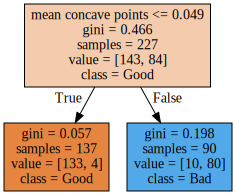

In [23]:
export_graphviz(tree_final, out_file="tree_final.dot", class_names = ["Good", "Bad"],
                feature_names = v_feature_names, impurity = True, filled = True)

with open("tree_final.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

### ==> mean concave points가 0.049보다 작거나 같으면 True, 크면 False로 분류한다.

#### vaildation 의 최종 모델 

In [24]:
y_pred = tree_final.predict(df_test_x)
print("Accuracy: {0:.3f}\n".format(tree_final.score(df_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy: 0.918

Confusion matrix: 
[[100   9]
 [  5  57]]


#### test데이터 최적의 parameter

In [25]:
tree_final = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 80)
tree_final.fit(df_test_first_x, df_test_first_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=80, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

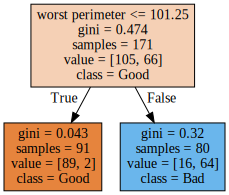

In [26]:
export_graphviz(tree_final, out_file="tree_final.dot", class_names = ["Good", "Bad"],
                feature_names = v_feature_names, impurity = True, filled = True)
with open("tree_final.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

#### test 의 최종 모델

In [27]:
y_pred = tree_final.predict(df_test_first_x)
print("Accuracy: {0:.3f}\n".format(tree_final.score(df_test_first_x, df_test_first_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_first_y, y_pred)))

Accuracy: 0.895

Confusion matrix: 
[[89 16]
 [ 2 64]]


## 설명변수 중요도

In [28]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_names
df_importance["Importance"] = tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
22,worst perimeter,1.0
0,mean radius,0.0
1,mean texture,0.0
28,worst symmetry,0.0
27,worst concave points,0.0
26,worst concavity,0.0
25,worst compactness,0.0
24,worst smoothness,0.0
23,worst area,0.0
21,worst texture,0.0


#### 설명변수의 중요도의 결과로 유의한 설명변수를 탐색

Text(0, 0.5, '설명변수')

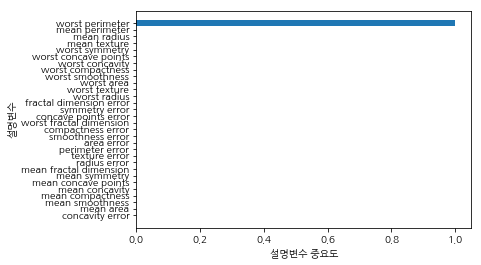

In [29]:
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

### ==> worst perimeter가 가장 유의한 변수로 나타난다.

In [30]:
estimator = DecisionTreeClassifier()
# 구하고자 하는 parameter와 범위
param_grid = {"max_depth": para_depth, "min_samples_split": para_split,
              "min_samples_leaf": para_leaf}
# 정확도가 높은 최적 parameter 찾기
grid_dt = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter: \n{}".format(grid_dt.best_params_))
print("\nbest score: \n{}".format(grid_dt.best_score_.round(3)))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


best estimator model: 
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=60, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

best parameter: 
{'max_depth': 1, 'min_samples_leaf': 60, 'min_samples_split': 2}

best score: 
0.925


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### ==> 최대 깊이(max_depth)가 1, 잎사귀 최소 샘플 수(min_samples_leaf)가 60개일 때 0.925로 정확도가 가장 높다. 